In [17]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np
import os
import itertools

In [18]:
def read_log(fname):
    namelist = ["Batch", "Start getting embeddings", "Start getting labels", "Start Back Propagation"]
    str2saveindex = {
        "Batch": 3, 
        "Start getting embeddings": 0, 
        "Start getting labels": 1, 
        "Start Back Propagation": 2
    }
    tslist = defaultdict(list)
    startflag = True
    with open(fname, "r") as f:
        for line in f.readlines():
            if startflag:
                startflag = False
                continue
            ts, s = line.rstrip().split("] ")
            ts = float(ts[1:])
            idx = str2saveindex[s]
            name = namelist[idx]
            tslist[name].append(ts)
    for n in tslist:
        tslist[n] = np.sum(tslist[n])
    
    return tslist

In [19]:
modelname = "transformer-RankQ-AvgAgg_nl2_sm_snl1"

original_fname = "../RolesWithinHyperedge/log_" + modelname + ".txt"
before_fname = "./before/log_" + modelname + ".txt"
after_fname = "./after/log_" + modelname + ".txt"

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

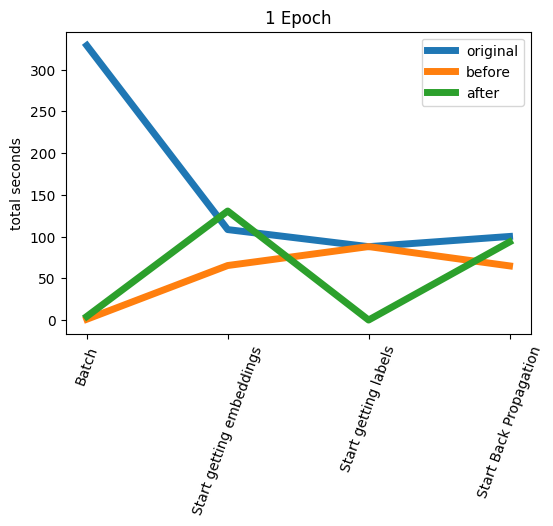

In [20]:
original_ts = read_log(original_fname)
before_ts = read_log(before_fname)
after_ts = read_log(after_fname)

plt.figure(dpi=100)
namelist = ["Batch", "Start getting embeddings", "Start getting labels", "Start Back Propagation"]
plt.plot(namelist, [original_ts[n] for n in namelist], label="original", linewidth=5)
plt.plot(namelist, [before_ts[n] for n in namelist], label="before", linewidth=5)
plt.plot(namelist, [after_ts[n] for  n in namelist], label="after", linewidth=5)
plt.legend()
plt.ylabel("total seconds")
plt.title("1 Epoch")
plt.xticks(rotation=70)

## Compare Model

In [25]:
model2ts = {}

for fname in os.listdir("./"):
    if fname.endswith(".txt"):
        modelname = fname.split("_")[1]
        model2ts[modelname] = read_log(fname)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

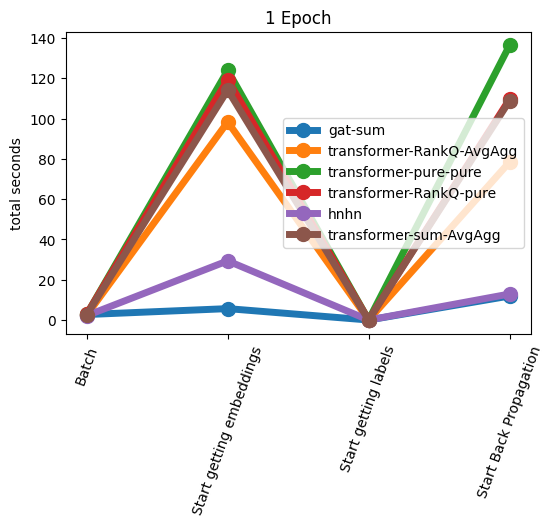

In [26]:
plt.figure(dpi=100)
namelist = ["Batch", "Start getting embeddings", "Start getting labels", "Start Back Propagation"]
for modelname in model2ts:
    ts = model2ts[modelname]
    plt.plot(namelist, [ts[n] for n in namelist], label=modelname, linewidth=5, marker='o', markersize=10)
plt.legend()
plt.ylabel("total seconds")
plt.title("1 Epoch")
plt.xticks(rotation=70)